In [125]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [126]:
def plot_all(model, x1, y1, x2, y2, rate):
    x   = np.linspace(-10, 70, 200)[:, None] * rate
    y   = np.linspace(-10, 70, 200)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()

    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    d = np.where(abs(mm2.T[0]) < 0.1)
    e = xx.T[0][d]
    f = yy.T[0][d]

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)


    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

    x2_ = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) ) * rate 
    y2_ = (np.concatenate([np.ones(N2)*12, np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2)]) ) * rate 
    plt.plot(x2_, y2_, linewidth=5, c='black')
    
    plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5, c='red')
    plt.plot(x2_0, y2_0, linewidth=5, c='blue')
    plt.scatter(e,f, s=10, c='navy')
    # plt.scatter(e,f)
    #     plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

In [127]:
N1 = 10
N2 = 10
rate = 0.01 # data scale
%matplotlib inline

In [169]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) ) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) ) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1)*10, np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) ) * rate
y1_1 = (np.concatenate([np.ones(N1)*8, np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) ) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [170]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) ) * rate 
x2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10]) ) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2)]) ) * rate 
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2)]) ) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

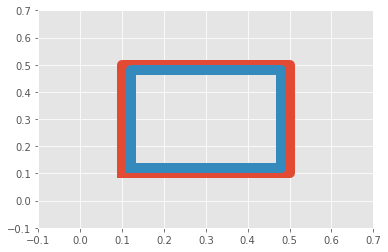

In [171]:
plt.plot(x1_0, y1_0, linewidth=10)
plt.plot(x2_0, y2_0, linewidth=10)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

# STEP1

In [172]:
step = 1
x2_0 = (np.concatenate([np.ones(N2)*48]) + np.random.randn(N2*step) * 0.2) * rate 
x2_1 = (np.concatenate([np.ones(N2)*50]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.linspace(12, 48, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.linspace(10, 50, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]

X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

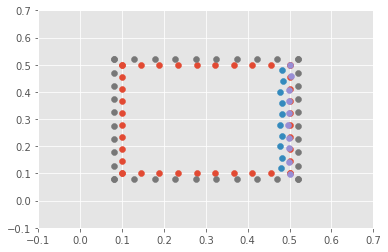

In [173]:
# plt.plot(x1_0, y1_0, linewidth=5)
# plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

plt.scatter(x2_1, y2_1)
plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [174]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=10000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[0.5896, 0.6486],
        [0.6486, 0.7506]])
sigma: tensor(-8.1072)
kernel: tensor([0.0982])
----- after learning -----
tensor([[0.5896, 0.6486],
        [0.6486, 0.7506]])


In [175]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.78543633, 0.8641352 ],
       [0.8641352 , 1.        ]], dtype=float32)

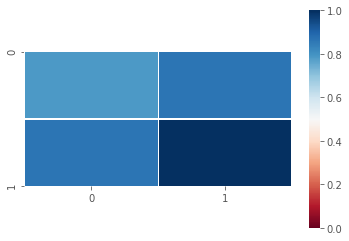

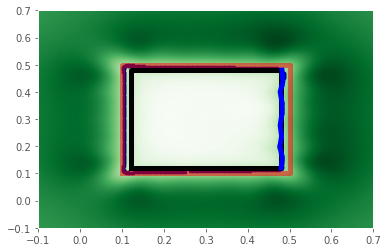

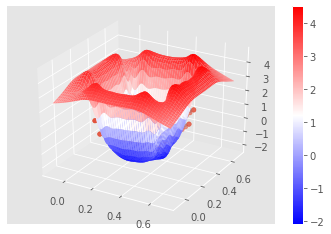

In [176]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP2

In [95]:
step = 2

x2_0 = (np.concatenate([np.ones(N2)*48, np.linspace(48, 12, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2_1 = (np.concatenate([np.ones(N2)*50, np.linspace(50, 10, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50]) + np.random.randn(N2*step) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]

X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

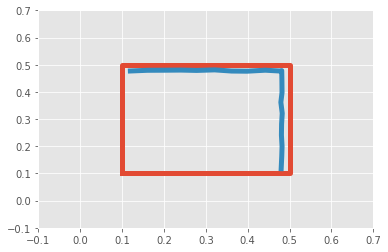

In [96]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [97]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.9446, 2.1084],
        [2.1084, 2.3236]])
sigma: tensor(-4.2202)
kernel: tensor([0.1395])
----- after learning -----
tensor([[1.9446, 2.1084],
        [2.1084, 2.3236]])


In [98]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.83687586, 0.9073607 ],
       [0.9073607 , 1.        ]], dtype=float32)

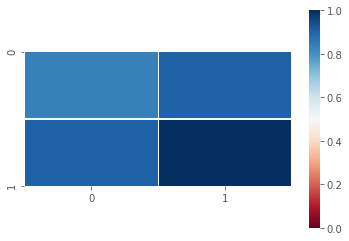

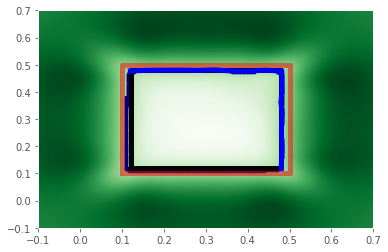

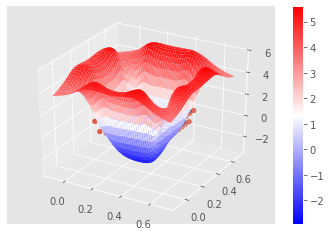

In [99]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP3

In [100]:
step = 3

x2_0 = (np.concatenate([np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) + np.random.randn(N2*step) * 0.2) * rate 
x2_1 = (np.concatenate([np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]

X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

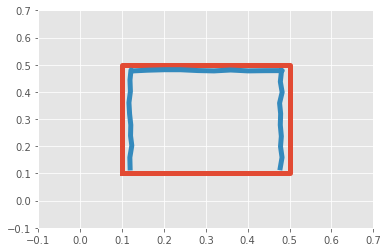

In [101]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [102]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.9834, 2.2526],
        [2.2526, 2.5911]])
sigma: tensor(-4.1924)
kernel: tensor([0.1402])
----- after learning -----
tensor([[1.9834, 2.2526],
        [2.2526, 2.5911]])


In [103]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.76546425, 0.8693681 ],
       [0.8693681 , 1.        ]], dtype=float32)

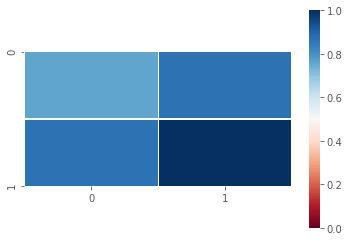

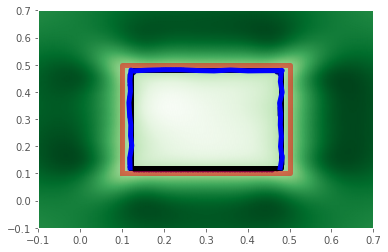

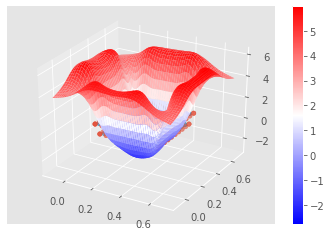

In [104]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP4

In [105]:
step = 4

x2_0 = (np.concatenate([np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12, np.linspace(12, 48, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2_1 = (np.concatenate([np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10, np.linspace(10, 50, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10]) + np.random.randn(N2*step) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]

X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

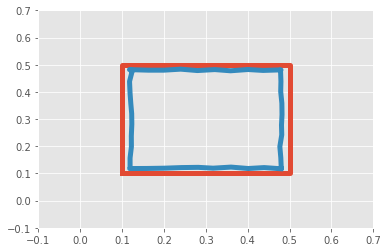

In [106]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [107]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.5763, 1.8356],
        [1.8356, 2.1684]])
sigma: tensor(-4.0782)
kernel: tensor([0.1312])
----- after learning -----
tensor([[1.5763, 1.8356],
        [1.8356, 2.1684]])


In [108]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.726964 , 0.8465316],
       [0.8465316, 1.       ]], dtype=float32)

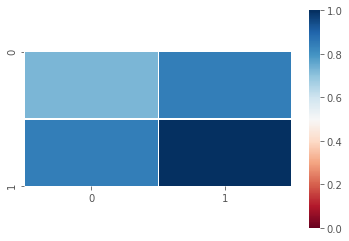

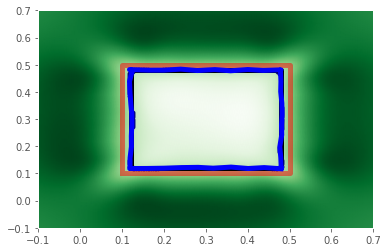

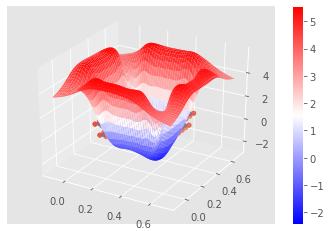

In [109]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


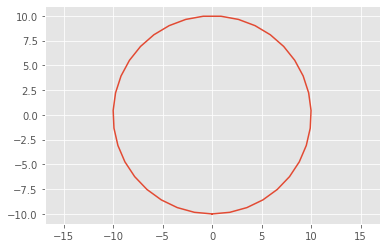

In [124]:
import matplotlib.pyplot as plt
import math
import numpy as np

x,y=[],[]

for _x in np.linspace(-180,180,36):
    x.append(math.sin(math.radians(_x)))
    y.append(math.cos(math.radians(_x)))

x = np.array(x) *10
y = np.array(y)*10
plt.plot(x,y)


plt.axes().set_aspect('equal','datalim') # 楕円に見えてしまうため縦横比を調整

plt.show() 

In [119]:
np.array(x)

array([-1.22464680e-16, -1.75010154e-02, -3.49966701e-02, ...,
        3.49966701e-02,  1.75010154e-02,  1.22464680e-16])

In [120]:
np.array(x)*2

array([-2.44929360e-16, -3.50020309e-02, -6.99933403e-02, ...,
        6.99933403e-02,  3.50020309e-02,  2.44929360e-16])